# Adaboosting, Gradient Boosting, XGBoost Classifier PostClass

## Boosting Process:
1. A subset is created from the original dataset.
2. Initially, all data points are given equal weight.
3. A base model is created in this subset.
4. This model is used to make predictions for the entire dataset.
5. Errors are calculated using actual values and predicted values.
6. More weight is given to incorrectly predicted observations.
7. Another model is created and predictions are made on the dataset (This model attempts to fix the bugs of the previous model.)
8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The last model (strong learner) is the weighted average of all models.

## Bagging vs Boosting:
1. Bagging uses Bootstrap. Boosting isn't uses Bootstrap.
2. Bagging uses average of the predictions. Boosting uses additive manner of predictions.
3. In the Bagging method, trees obtain their results independently from each other.
4. In boosting, each tree uses the results of the previous one. So trees are dependent each other.
5. Boosting in general is more exposed to overfitting compared to Bagging(Random Forest).

## Adaboost (Adaptive Boosting):
1. Forest of weak learners (trees with only 1 feaeture - stump)
2. Each tree depends on the previous tree's errors rather than being independent.
    - Starting with usual splitting criteria.
    - Each tree gets different weight based on its prediction accuracy.
    - Each observation gets a weight inversely related to its predicted outcome.
      - Example : Misclassified ones get more weight.
    - Aggregation is done based on each weak learner's weight.
3. A tree with just one node and two leaves is called a stump.
4. Stumps are not great at making accurate classification and stumps are technically "weak learners".
5. The three ideas behind Adaboost are:
    - Adaboost combines a lot of "weak learners" to make classifications.
    - Some stamps get more say in the classification than others.
    - Each stump is made by the previous stump's mistakes into account.
    
## Gradient Boosting Theory :
1. Like Adaboost, the Gradient Boosting algorithm is based on correcting the errors of the previous model. However, this correction is achieved by adding residual estimation errors to the model, not by changing whe weights like AdaBoost.
2. Some important differences of Gradient Boosting:
    - Everything starts with a leaf, not a stump.
    - You can create larger trees than AdaBoost.
    - Weak learners have the same learning rate.
    - The training for gradual series learning is based on the residuals of the previous model.
3. The smaller learning rate in Gradient Boosting would cost a longer time computational time for training. Because tiny value means each subsequent tree can't contribute much, and more trees are needed.

## XGBoost Theory :
1. XGBoost (extreme Gradient Boost) is an advanced implementation of the gradient boosting algorithm. XGBoost has proven to be an extremely effective machine learning algorithm, widely used in machine learning competitions.
2. XGBoost has high predictive power and is almost 10 times faster than other gradient boosting techniques. It also includes various adjustments that reduce overfitting and improve overall performance. For this reason, it also known as the "regular boost" technique.
3. The standart GBM implementation has no regulation like XGBoost. Therefore, XGBoost also helps reduce overfitting.
4. XGBoost implements parallel processing and is faster than GBM.
5. XGBoost allows users to define custom optimization targets and evaluation criteria that add a whole new dimension to the model.
6. XGBoost has a built-in routine to handle missing values.
7. XGBoost creates splits up to the specified max_depth and then starts pruning back the tree, removing splits beyond which there is no positive gain.
8. "max_depth" used to define the maximum depth.
9. Higher depth will allow the model to learn relationships that are specific to a particular instance.
10. XGBoost allows a user to cross-validate each iteration of the upgrade process so it's easy to get exactly the optimum number of upgrade iterations in a single transaction.
11. You don't need to fill in the missing values, as XGBoost takes care of the missing values itself. You can skip the fillna command we applied at the beginning.

---

---

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("advertising2.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df.shape

(1000, 10)

In [7]:
df["Clicked on Ad"].value_counts(normalize=True)
# Target feature balance bir dağılım gösteriyor. Accuracy score üzerinden gidebiliriz.

Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64

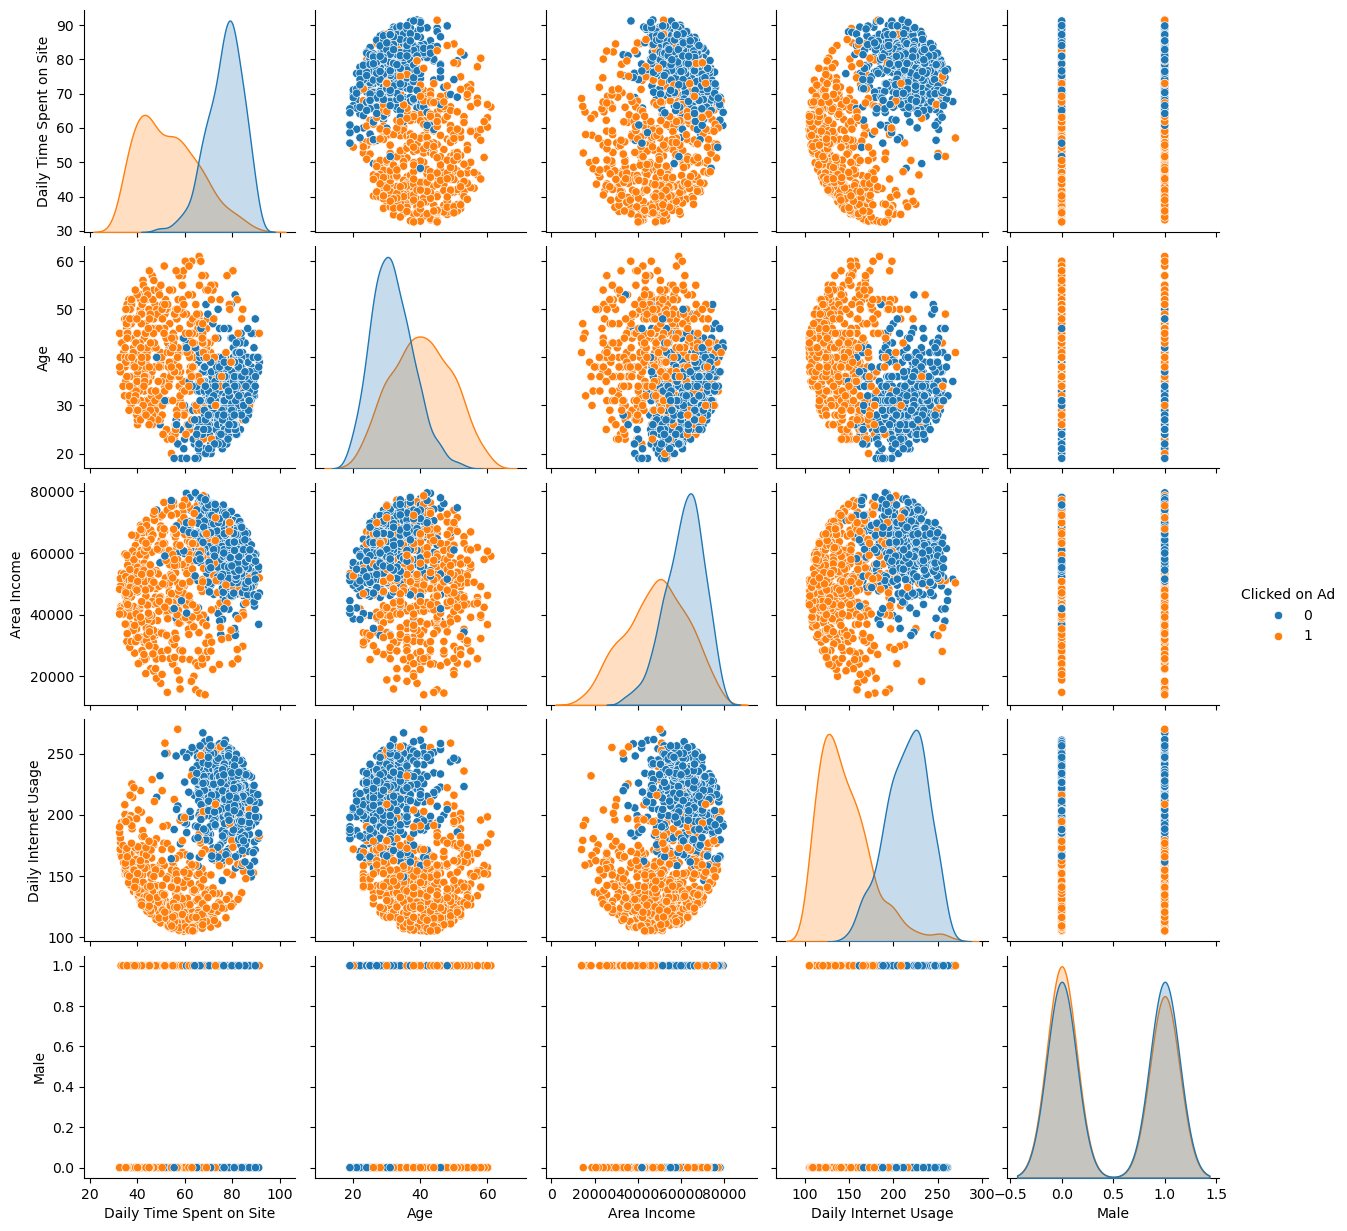

In [8]:
sns.pairplot(df, hue='Clicked on Ad')

## Train | Test Split

In [9]:
for feature in df.columns:
    if df[feature].dtype == "object":
        print(feature, df[feature].nunique())
# Kategorik sütunlarda çok fazla unique değer var. Bu şekilde modelim öğrenemez bu yüzden bunların tamamını atacağım.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


In [10]:
cat = df.select_dtypes("object").columns
cat

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [11]:
df.drop(columns=cat, inplace=True)

In [12]:
df.shape

(1000, 6)

In [17]:
from sklearn.model_selection import train_test_split as tts

In [18]:
X = df.drop(columns="Clicked on Ad")
y = df["Clicked on Ad"]

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
29,76.02,22,46179.97,209.82,0


## Modelling and Model Performance

In [24]:
from sklearn.ensemble import AdaBoostClassifier as adaC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

In [25]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [26]:
ada_model = adaC(random_state=42)
# AdaBoost Tree-Based bir model olduğu için scaling gerektirmez.

In [27]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [79]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        89
           1       0.94      0.92      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


Train_Set
[[409   2]
 [  7 382]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       0.99      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [80]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv=10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Burada test accuracy score 96, train accuracy score 99.  GridSearch ile best parametreleri bulalım.
# GridSearch ile optimize edeceğiz.

# Data sayısı az olmasına rağmen score iyi.

test_accuracy     0.960000
test_precision    0.958115
test_recall       0.961471
test_f1           0.959096
dtype: float64

## Gridsearch

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
ada_model = AdaBoostClassifier(random_state=42)

In [83]:
param_grid = {"n_estimators" : [30, 100, 200, 210, 220],
              "learning_rate" : [0.01, 0.1, 0.2, 0.5, 1.0]}

In [84]:
ada_grid_model = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring="accuracy", cv=10)
# Burada scoring = accuracy yaptığımız için modelimiz accuracy skorunu en iyileyecek.

In [85]:
%%time
ada_grid_model.fit(X_train, y_train)

CPU times: total: 19.6 s
Wall time: 19.8 s


GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [30, 100, 200, 210, 220]},
             scoring='accuracy')

In [86]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [87]:
ada_grid_model.best_score_
# Yukarıda GridSearch içinde scoring olarak Accuracy belirttiğim için buradaki best score accuracy score.
# Ayrıca bu skor train datasının skoru

0.9724999999999999

In [88]:
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Train_Set
[[410   1]
 [ 14 375]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       411
           1       1.00      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [89]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

ada_f1, ada_recall, ada_auc # Burada tüm modelleri daha sonra kıyaslamak için skorları kayıt altına aldım.

(0.9417040358744394, 0.9459459459459459, 0.9848162769511084)

## Feature_importances

In [90]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [91]:
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

array([0.29, 0.18, 0.25, 0.28, 0.  ])

In [92]:
ada_FIM = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ["ada_importance"])
ada_FIM.sort_values(by="ada_importance", ascending=False, inplace=True)
ada_FIM

,ada_importance
Daily Time Spent on Site,0.29
Daily Internet Usage,0.28
Area Income,0.25
Age,0.18
Male,0.00


In [93]:
ada_FIM.index

Index(['Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income',
       'Age', 'Male'],
      dtype='object')

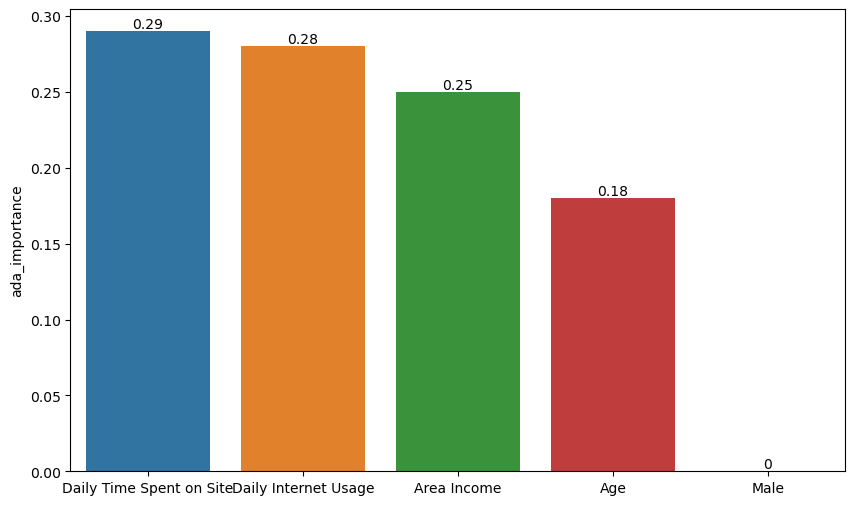

In [94]:
ax = sns.barplot(data = ada_FIM, x = ada_FIM.index, y =  "ada_importance")
for container in ax.containers:
    ax.bar_label(container)

In [95]:
# Burada cinsiyetin importance'ı 0 çıktı. Eğer bu mdoelle devam etmek istersem bu feature'u atarım.

## Evaluating ROC Curves and AUC

In [96]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

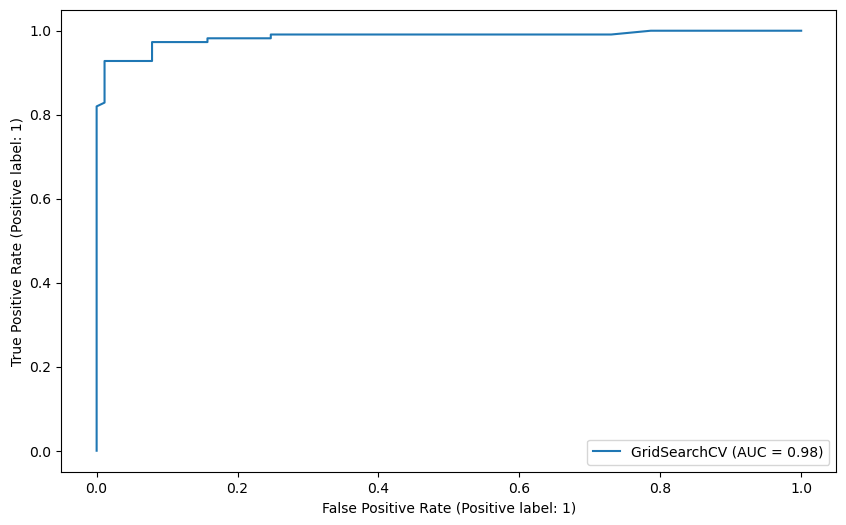

In [97]:
plot_roc_curve(ada_grid_model, X_test, y_test)
# Burada binary bir classification yaptığımız için ROC_Curve çizdirebildik.
# Multi-Class bir target olasydı ROC_Curver çizdiremezdik.
# Balance bir data olduğu için Roc Curve' e baktık. Imbalance  datalarda precision-recall curve tercih ederiz.

## Gradient Boosting Modelling and Model Performance

In [98]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [99]:
gb_model = GradientBoostingClassifier(random_state = 42)

In [100]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [101]:
eval_metric(gb_model, X_train, y_train, X_test, y_test)
# Burada default değerlerle modeli uyguladığımda train accuracy_score  1 çıktı. Test accuracy score ise 0.93.
# Overfit durumu var gibi. Ancak CrossValidate sonrası daha iyi anlayacaz.

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [  1 388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [102]:
gb_model = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb_model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Train score 1, Test Score 0.966. Overfit yok gibi... GridSearch ile best parametreler ile score'u eniyilemeye çalışalım.

test_accuracy     0.966250
test_precision    0.967471
test_recall       0.964035
test_f1           0.965316
test_roc_auc      0.988989
dtype: float64

## Gridsearch

In [124]:
param_grid = {
    "n_estimators" : [100, 150, 200],    # Burada n_estimators, aynı anda kaç model işlem yapacak onu belirliyor.
    "subsample" : [0.3, 0.4, 0.5],       # Subsample ise bu modellerin datadan alınacak örneklem miktarıdır.
    "max_features" : [None, 2, 3, 4],
    "learning_rate" : [0.001, 0.01, 0.1], # Learning rate ile overfit üzerinde etki kurabiliriz.
    "max_depth" : [4, 5, 6, 7]
}

In [125]:
gb_model = GradientBoostingClassifier(random_state=42)
# GridSearch öncesi ve  Cross val öncesi modeli tazelemekte fayda var.

In [126]:
gb_grid_model = GridSearchCV(estimator = gb_model,
                             param_grid = param_grid,
                             scoring = "accuracy", # Data dengeli olduğu için accuracy skorunu en iyilemek istiyorum.
                             verbose = 2,
                             cv=10,
                             n_jobs = -1) # Burada n_jobs = -1 yaparak işlemcimi bu işleme odaklıyorum.

In [127]:
%%time
gb_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
CPU times: total: 3.08 s
Wall time: 1min 7s


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='accuracy', verbose=2)

In [128]:
gb_grid_model.best_score_

0.9724999999999999

In [129]:
gb_grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 2,
 'n_estimators': 200,
 'subsample': 0.4}

In [130]:
eval_metric(gb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 84   5]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        89
           1       0.95      0.92      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# Skorlarımızda hiç iyileşme olmadı. 0.93-1.0

In [132]:
y_pred = gb_grid_model.predict(X_test)
y_pred_proba = gb_grid_model.predict_proba(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

gb_f1, gb_recall, gb_auc

(0.9357798165137614, 0.918918918918919, 0.9817795323413301)

## Feature importances

In [133]:
gb_grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 2,
 'n_estimators': 200,
 'subsample': 0.4}

In [138]:
gb_model = GradientBoostingClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      max_features=2,
                                      n_estimators=200,
                                      subsample=0.4,
                                      random_state=42)
gb_model.fit(X_train, y_train)

gb_model.feature_importances_

array([0.31946851, 0.10619103, 0.14211776, 0.42538791, 0.00683478])

In [202]:
gb_FIM = pd.DataFrame(index = X.columns, data = gb_model.feature_importances_, columns=["gb_importance"])
gb_FIM.sort_values(by="gb_importance", ascending=False)

,gb_importance
Daily Internet Usage,0.425388
Daily Time Spent on Site,0.319469
Area Income,0.142118
Age,0.106191
Male,0.006835


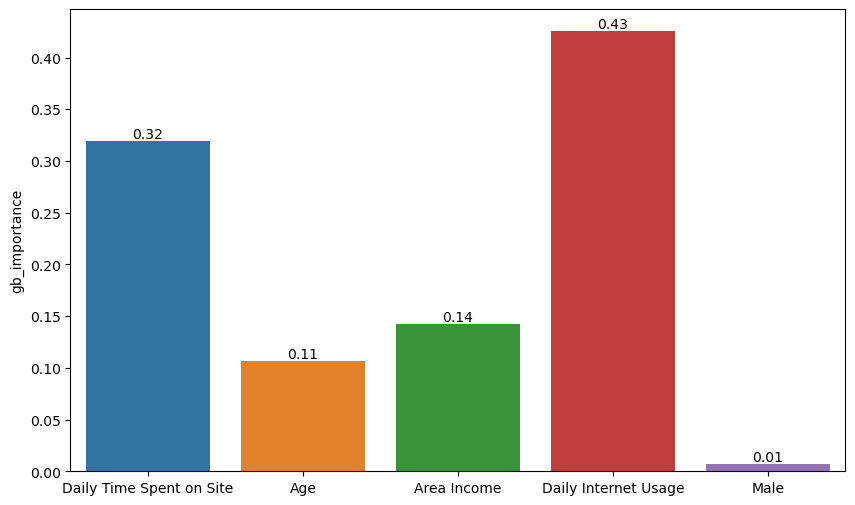

In [206]:
ax = sns.barplot(data = gb_FIM, x = gb_FIM.index, y = "gb_importance")
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f")

In [146]:
# Bu model için de cinsiyetin feature importance'ı çok düşük çıktı.

## Evaluating ROC Curves and AUC

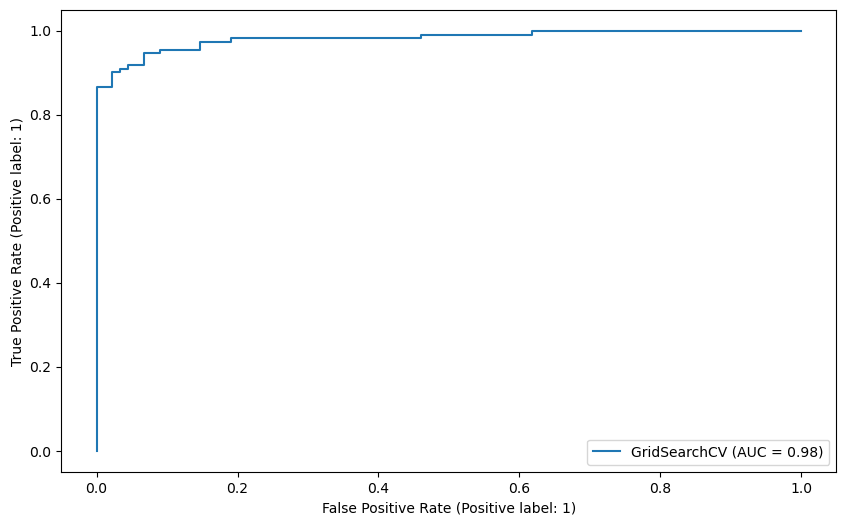

In [147]:
plot_roc_curve(gb_grid_model, X_test, y_test);

## XG Boosting Modelling and Model Performance

In [148]:
from xgboost import XGBClassifier

In [149]:
xgb_model = XGBClassifier(random_state=42)

In [150]:
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [152]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)
# Burada puanlarım test=0.94, train = 0.99.. ancak test scorunu cross_validate ile doğrulamalıyız.

Test_Set
[[ 82   7]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Train_Set
[[410   1]
 [  7 382]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       1.00      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [155]:
xgb_model = XGBClassifier(random_state=42)
scores = cross_validate(xgb_model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv = 10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

# Burada puanlarım test=0.96, train = 0.99.. Çok güzel skorelar. Hem birbirine yakın hem yüksek.
# Bakalım GridSearch ile daha da iyi score'lar alabilecek miyiz.

test_accuracy     0.960000
test_precision    0.966615
test_recall       0.951147
test_f1           0.958421
test_roc_auc      0.988583
dtype: float64

## Gridsearch

In [176]:
param_grid = {
    "n_estimators" : [50, 80, 100, 110, 200, 220, 250],
    "max_depth" : [3, 4, 5, 6, 7],
    "learning_rate" : [0.05, 0.07, 0.1, 0.2, 0.3, 0.4],
    "subsample" : [0.3, 0.4, 0.5, 0.8, 1], # Burada her bir model datanın ne kadarını örneklem olacak oran olarak belirttik.
    "colsample_bytree" : [0.05, 0.1, 0.2, 0.3, 0.4] # Burada her bir model feature'ların ne kadarını örneklem olarak alacağını yazdık.
}

In [177]:
xgb_model = XGBClassifier(random_state=42)

In [178]:
xgb_grid_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring="accuracy", verbose=2, n_jobs= -1, cv=10)

In [179]:
%%time
xgb_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 5250 candidates, totalling 26250 fits
CPU times: total: 15 s
Wall time: 3min 37s


GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.07, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 80, 100, 110, 200, 220, 250],
                         'subsample': [0.3, 0.4, 0.5, 0.8, 1]},
             scoring='accuracy', verbose=2)

In [180]:
xgb_grid_model.best_score_

0.9737500000000001

In [181]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.05,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [183]:
xgb_grid_model.best_estimator_

XGBClassifier(colsample_bytree=0.05, learning_rate=0.3, random_state=42,
              subsample=0.8)

In [184]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 82   7]
 [  6 105]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        89
           1       0.94      0.95      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Train_Set
[[411   0]
 [  6 383]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      0.98      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [185]:
# Skorda bir gelişme olmadı gibi. Kaydedelim en son tüm modelleri karşılaştıracaz.

In [233]:
y_pred = xgb_grid_model.predict(X_test)
y_pred_proba = xgb_grid_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

xgb_f1, xgb_recall, xgb_auc

(0.9417040358744394, 0.9459459459459459, 0.9792489118331815)

## Feature importances

In [197]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.05,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [196]:
xgb_model = XGBClassifier(random_state=42,
                          colsample_bytree=0.3,
                          learning_rate = 0.3,
                          max_depth = 3,
                          n_estimators = 100,
                          subsample=0.8)

xgb_model.fit(X_train, y_train)

xgb_model.feature_importances_

array([0.40398607, 0.11710357, 0.12504718, 0.3450972 , 0.00876603],
      dtype=float32)

In [204]:
xgb_FIM = pd.DataFrame(index=X.columns, data=xgb_model.feature_importances_, columns=["xgb_importance"])
xgb_FIM.sort_values(by="xgb_importance", ascending=False)
xgb_FIM

,xgb_importance
Daily Time Spent on Site,0.403986
Age,0.117104
Area Income,0.125047
Daily Internet Usage,0.345097
Male,0.008766


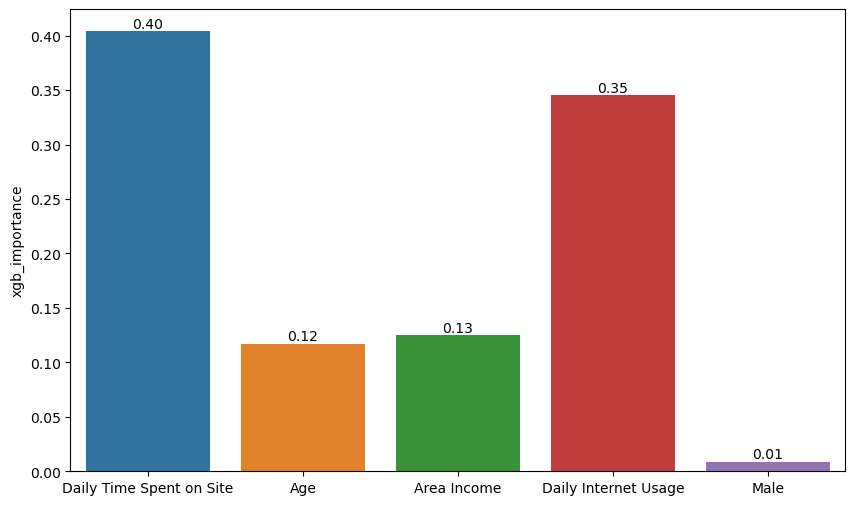

In [205]:
ax = sns.barplot(data=xgb_FIM, x=xgb_FIM.index, y="xgb_importance")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")

## Feature importance comparison

In [207]:
pd.concat([ada_FIM, gb_FIM, xgb_FIM], axis=1)

,ada_importance,gb_importance,xgb_importance
Daily Time Spent on Site,0.29,0.319469,0.403986
Daily Internet Usage,0.28,0.425388,0.345097
Area Income,0.25,0.142118,0.125047
Age,0.18,0.106191,0.117104
Male,0.00,0.006835,0.008766


## Evaluating ROC Curves and AUC

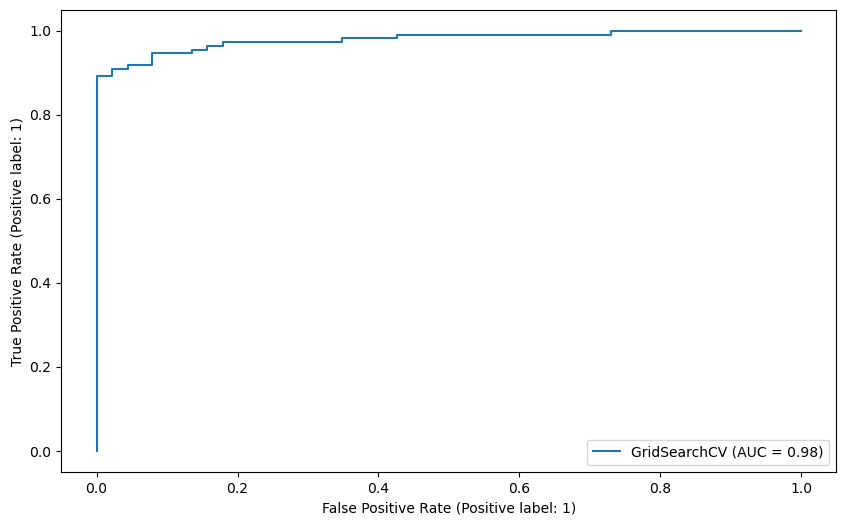

In [208]:
plot_roc_curve(xgb_grid_model, X_test, y_test);

## Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf_model = RandomForestClassifier(random_state=42)

In [237]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [238]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [239]:
model = RandomForestClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

# Burada test_score = 0.97, train_score =1 . 
# Train score'un tamamının 1 olması beni overfit konusunda şüphelendiriyor.
# GridSearch yapalım en uygun parametreleri bulalım. İkna olmazsak Train score'larını düşürürüz.
# Aslında train score'larımız zaten maximum. GRidSearch yapmadan geçebilirdik.

test_accuracy     0.970000
test_precision    0.976764
test_recall       0.961471
test_f1           0.968788
test_roc_auc      0.991681
dtype: float64

### GridSearch

In [240]:
X_train.shape
# 5 feature var. max_features parametresi için buna baktım.

(800, 5)

In [241]:
param_grid = {
    "n_estimators" : [48, 64, 75, 128, 250],
    "max_depth" : [2, 3, 4, 5],
    "min_samples_leaf" : [1, 2, 3],
    "min_samples_split" : [2, 3, 5],
    "max_features" : ["auto",1, 3, 5]
}

In [242]:
rf_model = RandomForestClassifier(random_state=42)

In [243]:
rf_grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=10)

In [244]:
%%time
rf_grid_model.fit(X_train, y_train)

CPU times: total: 7.02 s
Wall time: 1min 38s


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 1, 3, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [48, 64, 75, 128, 250]},
             scoring='accuracy')

In [245]:
rf_grid_model.best_score_

0.9724999999999999

In [246]:
rf_grid_model.best_params_

{'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [247]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)
# Bu skore'lar ile overfitting şüphesinden kurtulduk. Test puanımız değişmedi ancak train 2 puan düştü.

Test_Set
[[ 83   6]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Train_Set
[[409   2]
 [ 13 376]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       411
           1       0.99      0.97      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [249]:
rf_grid_model.best_params_

{'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [260]:
y_pred = rf_grid_model.predict(X_test)
y_pred_proba = rf_grid_model.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

rf_f1, rf_recall, rf_auc

(0.9363636363636363, 0.9279279279279279, 0.9770219657860106)

## Decision Tree

In [261]:
from sklearn.tree import DecisionTreeClassifier

In [262]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [263]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 79  10]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        89
           1       0.91      0.93      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [266]:
dt_model = DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt_model, X_train, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.951250
test_precision    0.957036
test_recall       0.943387
test_f1           0.949443
test_roc_auc      0.950962
dtype: float64

### GridSearch

In [268]:
dt_model = DecisionTreeClassifier(random_state=42)

In [269]:
param_grid = {
    "splitter" : ["best", "random"],
    "max_features" : [None, 2, 3, 4],
    "max_depth" : [None, 2, 3, 4],
    "min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split" : [2, 3, 4, 5, 6, 7]
}

In [270]:
dt_grid_model = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=10)

In [272]:
%%time
dt_grid_model.fit(X_train, y_train)

CPU times: total: 1.55 s
Wall time: 5.43 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [273]:
dt_grid_model.best_score_

0.9625

In [274]:
dt_grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [275]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(min_samples_leaf=5, random_state=42, splitter='random')

In [276]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 84   5]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        89
           1       0.95      0.90      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200


Train_Set
[[402   9]
 [ 19 370]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       411
           1       0.98      0.95      0.96       389

    accuracy                           0.96       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800



In [277]:
y_pred = dt_grid_model.predict(X_test)
y_pred_proba = dt_grid_model.predict_proba(X_test)

dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred_proba[:,1])

dt_f1, dt_recall, dt_auc

(0.925925925925926, 0.9009009009009009, 0.9684178560583054)

## Logistic Regression

In [363]:
# Logistic Regression'da datanın durumuna göre scaling yapmak gerekebiliyor.
# Data'da 1 tane dummy'li feature olduğu için MinMaxScaler tercih ederim.
# Burada multiclass durum yok class olarak sadece 0-1 var.

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [364]:
scaler = MinMaxScaler()

In [365]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [366]:
log_model = LogisticRegression()

In [367]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [368]:
eval_metric(log_model, X_train_scaled, y_train, X_test, y_test)

Test_Set
[[ 89   0]
 [111   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200


Train_Set
[[408   3]
 [ 16 373]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       411
           1       0.99      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [369]:
log_model = DecisionTreeClassifier(random_state=42)
scores = cross_validate(log_model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]
# Underfit bir durum var gibi.

test_accuracy     0.950000
test_precision    0.954333
test_recall       0.943387
test_f1           0.948180
test_roc_auc      0.949742
dtype: float64

### GridSearch

In [370]:
log_model = DecisionTreeClassifier(random_state=42)

In [371]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split" : [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf" : [1, 2, 3, 4],
    "max_features" : [1, 2, 3, 4, 5],
    "class_weight" : ["balanced", None],
    "ccp_alpha" : [0, 0.1, 0.3]
}

In [372]:
log_grid_model = GridSearchCV(estimator=log_model, param_grid=param_grid, scoring="accuracy", n_jobs=-1 ,cv=10)

In [373]:
%%time
log_grid_model.fit(X_train_scaled, y_train)

CPU times: total: 13.2 s
Wall time: 20.8 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.1, 0.3],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [374]:
log_grid_model.best_params_

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [377]:
log_grid_model.best_score_

0.96125

In [378]:
eval_metric(log_grid_model, X_train_scaled, y_train, X_test, y_test)

Test_Set
[[ 89   0]
 [111   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200


Train_Set
[[411   0]
 [ 10 379]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       411
           1       1.00      0.97      0.99       389

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [379]:
y_pred = log_grid_model.predict(X_test)
y_pred_proba = log_grid_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

log_f1, log_recall, log_auc

(0.0, 0.0, 0.5)

## KNN

In [398]:
# KNN distance-based bir model. Bu yüzden scaling şart.

In [380]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [381]:
knn_model = KNeighborsClassifier()

In [382]:
scaler = MinMaxScaler()

In [383]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [384]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [385]:
eval_metric(knn_model, X_train_scaled, y_train, X_test, y_test)

Test_Set
[[ 89   0]
 [111   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200


Train_Set
[[411   0]
 [ 19 370]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       411
           1       1.00      0.95      0.97       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [386]:
knn_model = KNeighborsClassifier()
scores = cross_validate(knn_model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy     0.966250
test_precision    0.989388
test_recall       0.940891
test_f1           0.964093
dtype: float64

### GridSearch

In [387]:
knn_model = KNeighborsClassifier()

In [389]:
param_grid = {
    "n_neighbors" : range(1,30),
    "p" : [1, 2],
    "weights" : ["uniform", "distance"],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [390]:
knn_grid_model = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring="accuracy", cv=10)

In [391]:
%%time
knn_grid_model.fit(X_train_scaled, y_train )

CPU times: total: 15 s
Wall time: 15.1 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [392]:
knn_grid_model.best_score_

0.9712500000000001

In [393]:
knn_grid_model.best_params_

{'algorithm': 'auto', 'n_neighbors': 18, 'p': 2, 'weights': 'distance'}

In [395]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test, y_test)

Test_Set
[[ 89   0]
 [111   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        89
           1       0.00      0.00      0.00       111

    accuracy                           0.45       200
   macro avg       0.22      0.50      0.31       200
weighted avg       0.20      0.45      0.27       200


Train_Set
[[411   0]
 [  0 389]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       389

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [397]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

knn_f1, knn_recall, knn_auc

(0.0, 0.0, 0.3133920437291224)

## SVM

In [399]:
# SVM distance-based olduğu için scaling gerekir.
# Roc Curve çizebilmek için probability = True yapmalıyız.
# Daha önce scale işlemi yaptığım için artık burada yapmayacağım.

In [401]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [402]:
svm_model = SVC(probability=True)

In [403]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [404]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 85   4]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        89
           1       0.96      0.94      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200


Train_Set
[[407   4]
 [ 14 375]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       0.99      0.96      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [405]:
svm_model = SVC(probability=True)
scores = cross_validate(svm_model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv=10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_accuracy     0.971250
test_precision    0.984534
test_recall       0.956343
test_f1           0.969879
dtype: float64

### GridSearch

In [406]:
svm_model = SVC(probability=True)

In [407]:
param_grid = {
    "C" : [0.001, 0.05, 0.01, 0.1],
    "gamma" : ["scale", "auto", 0.2, 0.3],
    "kernel" : ["rbf", "linear"],
    "class_weight" : [None, "balanced"]
}

In [408]:
svm_grid_model = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=10, verbose=2)

In [409]:
%%time
svm_grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
CPU times: total: 531 ms
Wall time: 12.1 s


GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 0.01, 0.1],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto', 0.2, 0.3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [410]:
svm_grid_model.best_score_

0.9737499999999999

In [411]:
svm_grid_model.best_params_

{'C': 0.05, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

In [412]:
eval_metric(svm_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 86   3]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.97      0.92      0.94       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


Train_Set
[[408   3]
 [ 18 371]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       411
           1       0.99      0.95      0.97       389

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [414]:
y_pred = svm_grid_model.predict(X_test)
y_pred_proba = svm_grid_model.predict_proba(X_test)

svm_f1 = f1_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_auc = roc_auc_score(y_test, y_pred_proba[:,1])

svm_f1, svm_recall, svm_auc

(0.7138263665594855, 1.0, 0.5)

## Comparing Models

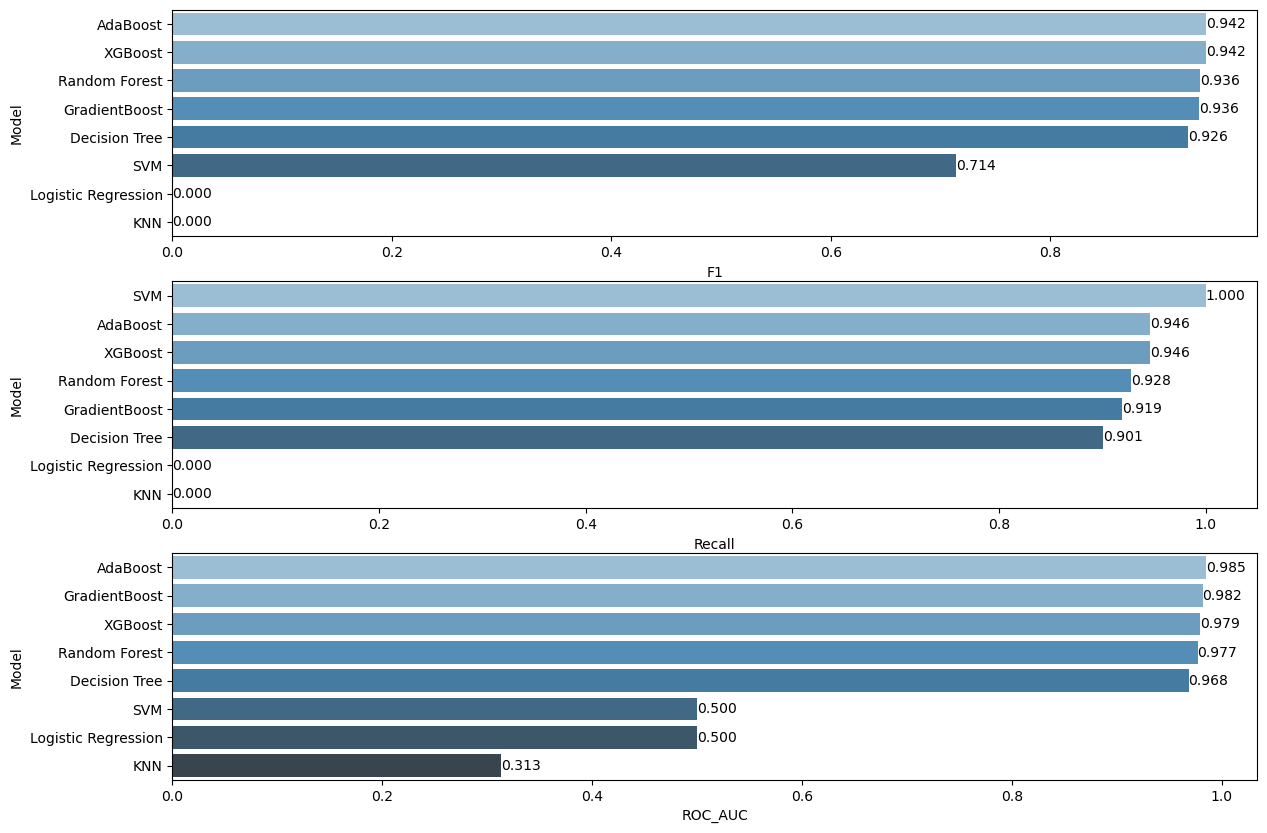

In [417]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svm_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svm_recall, dt_recall, rf_recall, ada_recall, gb_recall, 
                                   xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svm_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [418]:
# Burada artık  tüm modellerimizin sonucunu karşılaştırıyoruz.
# Bu data özelinde data küçük olduğu için ya da dağılımı uygun olmadığı için XGBoost beklentimizi karşılamadı.
# Logistic Regression bir datada iyi bir sonuç veriyorsa model, datayı linear bir yüzey ile ayırabilmiş demektir.
    # Logistic Regression başarılıysa kullanılabilir. Daha advance bir modele gerek yok.
# Gene yöntem bu notebook'taki gibidir. Bfütün modeller çalıştırılır ve en iyi modelle yola devam edilir.


# Bu notlar inclass notları. ANcak postclass esnasında ben en uygun modeli AdaBoost olarak buldum ve 2 puan düşük kaldı.
# Belki burada Logistic Regression ve KNN modelinde uygulamada hata yapmış olabilirim. Daha sonra bakılacak.

In [ ]:
# PyCaret ile tüm modelleri deneyip en uygunu otomatik olarak bulabilirsiniz.